In [1]:
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dire="../zd"
# filename="1_feature.csv"
# testfile="1_test_feature.csv"

In [3]:
def plt_plot(y_real,y_predicted):
    fig = plt.figure(figsize=(32,16))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(len(y_real)),y_real, color='g')
    ax.plot(range(len(y_predicted)),y_predicted,color='r')
    plt.show()
def Error_compute(y_real,y_predicted):
    y_diff=y_real-y_predicted
    diff_positive=y_diff[y_diff>0]
    diff_negitive_0=y_diff[y_diff<=0]
    if diff_negitive_0.shape[0] >0:
        sum_negitive_error=sum(np.exp(-np.log(0.5)*(diff_negitive_0/5)))
    else:
        sum_negitive_error=0
    if diff_positive.shape[0] >0:
        sum_positive_error=sum(np.exp(np.log(0.5)*(diff_positive/20)))
    else:
        sum_positive_error=0
    return (sum_negitive_error+sum_positive_error)/len(y_real)

In [7]:
df_feature = pd.read_csv(os.path.join(data_dire,"1_feature.csv"))
df_feature = df_feature[:-60]

df_feature["residual_life"]=(48*5)-df_feature['tool_age']
# df_train1=df_feature
df_train1=df_feature[(df_feature["tool_age"]<=40)]
df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
df_validation=df_feature[(df_feature["tool_age"]>130)]

df_feature = pd.read_csv(os.path.join(data_dire,"2_feature.csv"))
df_feature["residual_life"]=(48*5)-df_feature['tool_age']
df_train2=df_feature
# df_train2=df_feature[(df_feature["tool_age"]<=40)]
# df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
# df_validation=df_feature[(df_feature["tool_age"]>130)]

df_feature = pd.read_csv(os.path.join(data_dire,"3_feature.csv"))
df_feature["residual_life"]=(37*5)-df_feature['tool_age']
df_train3=df_feature
# df_train3=df_feature[(df_feature["tool_age"]<=40)]
# df_test = df_feature[(df_feature["tool_age"]>40)&(df_feature["tool_age"]<=130)]
# df_validation=df_feature[(df_feature["tool_age"]>130)]

df_train=pd.concat([df_train1,df_train2],axis=0)
df_train=pd.concat([df_train,df_train3],axis=0)
print(df_train.shape,df_test.shape)
columns_list=list(df_train.columns)
columns_list.remove("residual_life")
print(columns_list)
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(df_train[columns_list])
y_train = df_train["residual_life"]
x_test = min_max_scaler.fit_transform(df_test[columns_list])
y_test = df_test["residual_life"]
x_validation = min_max_scaler.fit_transform(df_validation[columns_list])
y_validation = df_validation["residual_life"]                         
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_validation.shape,y_validation.shape)

(5332, 42) (1045, 42)
['v1_absmean', 'v2_absmean', 'v3_absmean', 'c_absmean', 'v1_absmedia', 'v2_absmedia', 'v3_absmedia', 'c_absmedia', 'v1_absmode', 'v2_absmode', 'v3_absmode', 'c_absmode', 'v1_absrange', 'v2_absrange', 'v3_absrange', 'c_absrange', 'v1_absstdn', 'v2_absstdn', 'v3_absstdn', 'c_absstdn', 'v1_absvar', 'v2_absvar', 'v3_absvar', 'c_absvar', 'v1_maxvalue', 'v2_maxvalue', 'v3_maxvalue', 'c_maxvalue', 'v1_absmax', 'v2_absmax', 'v3_absmax', 'c_absmax', 'v1_minvalue', 'v2_minvalue', 'v3_minvalue', 'c_minvalue', 'v1_absmin', 'v2_absmin', 'v3_absmin', 'c_absmin', 'tool_age']
(5332, 41) (5332,) (1045, 41) (1045,) (1241, 41) (1241,)


fit finished


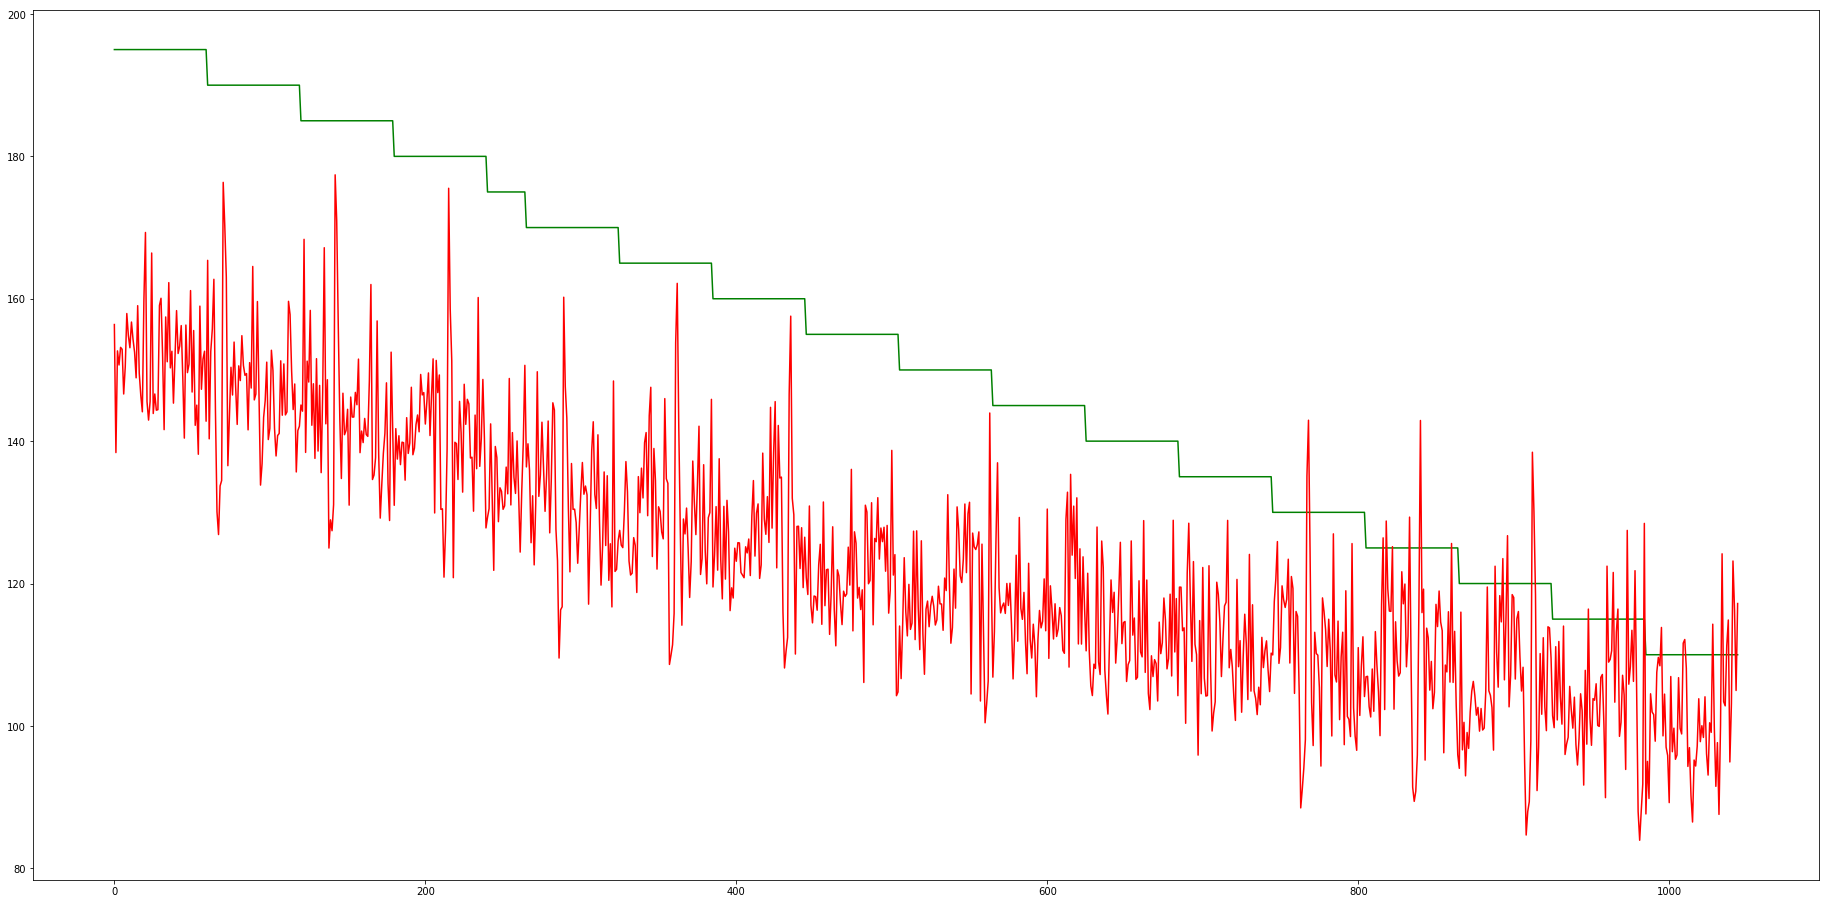

In [8]:
from sklearn.svm import SVR
clf = SVR(gamma='auto')
clf.fit(x_train, y_train)
print("fit finished")
y_predicted=clf.predict(x_test)

df_result=pd.DataFrame({"real":y_test,"predicted":y_predicted})
df_result.to_csv("result_SVR_11_26.csv",index=False)
plt_plot(y_test,y_predicted)

0.3944956602136108


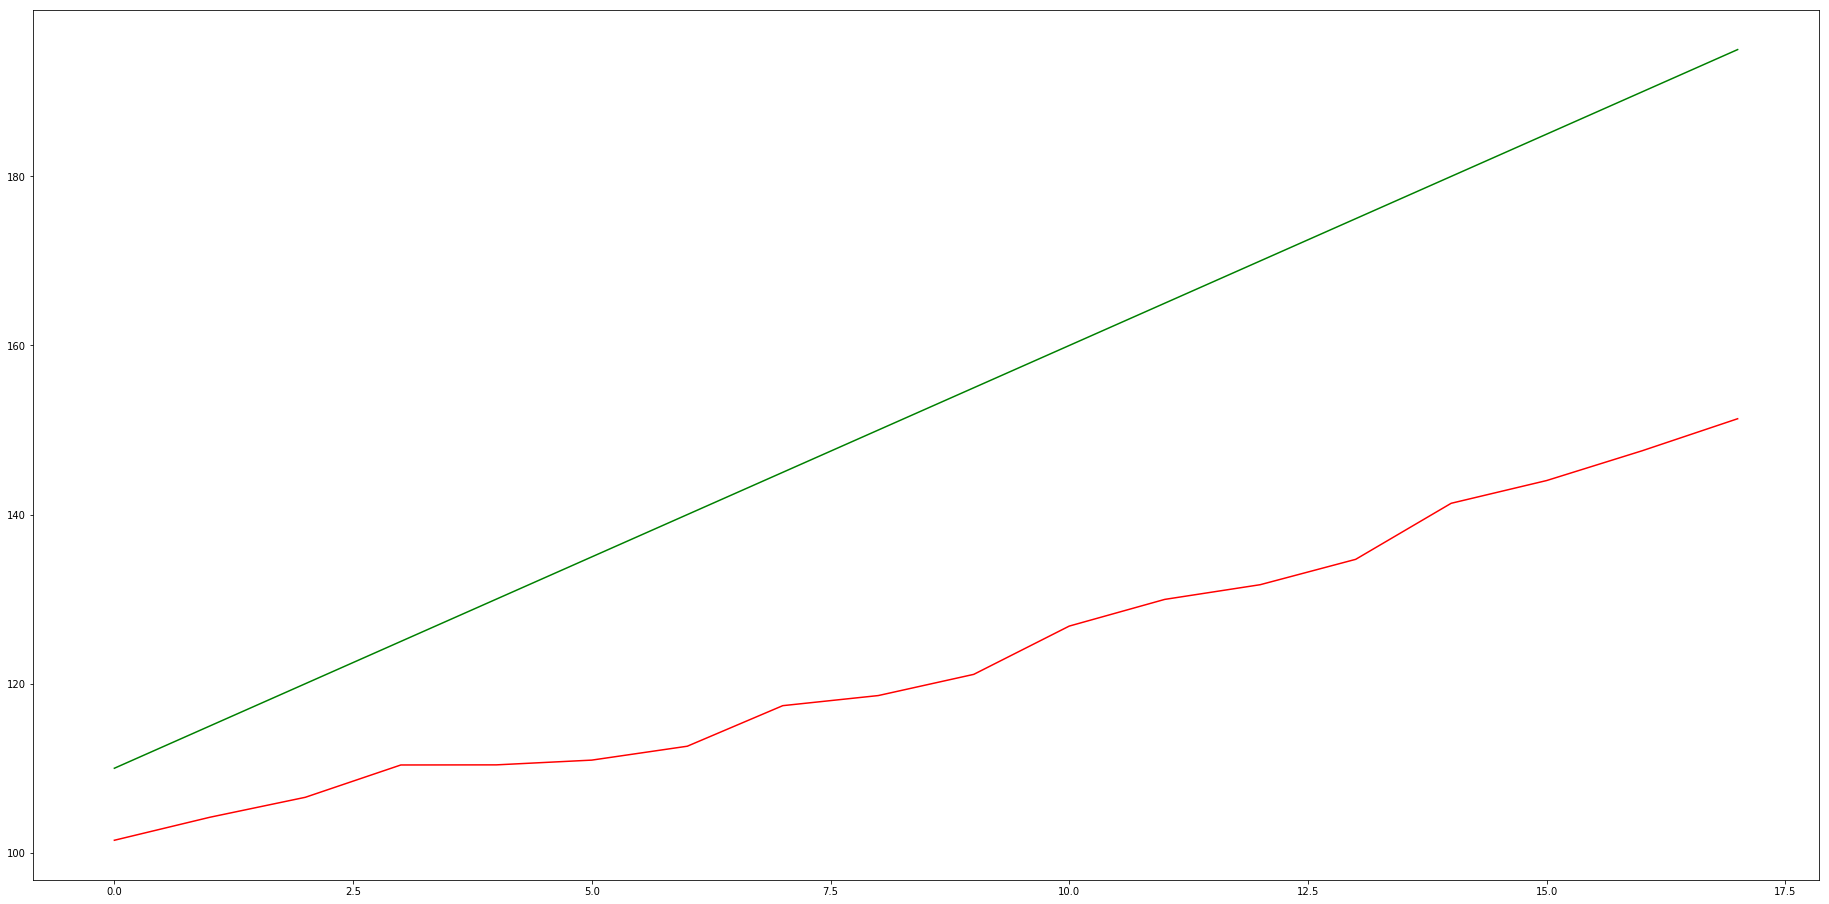

In [9]:
df_result=pd.read_csv("result_SVR_11_26.csv")
df_predict=df_result["predicted"].groupby(df_result['real']).mean()
err=Error_compute(df_predict.index,df_predict)
print(err)
plt_plot(df_predict.index,df_predict)